In [1]:
import numpy as np
import braneCount
import braneCreate
import braneMatrix
import braneAnalysis
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.stats import gaussian_kde
# from tqdm.notebook import tqdm
import colorcet as ccet
from itertools import combinations, product
import time
import glob

C:\Users\gerg1\Dropbox\Intersecting branes\Brane count\braneAnalysis.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams.update({
  'text.usetex': True,
  'text.latex.preamble': r'\usepackage{amsmath,amssymb,cancel}',
  'font.family': 'Helvetica',
  'figure.dpi': 300
})

In [4]:
bix2_list = ['000', '001', '010', '100', '011', '101', '110', '111']
bix2_labels = [r'$b_i=(0,0,0)$', r'$b_i=(0,0,\frac{1}{2})$', r'$b_i=(0,\frac{1}{2},0)$',
               r'$b_i=(\frac{1}{2},0,0)$', r'$b_i=(0,\frac{1}{2},\frac{1}{2})$',
               r'$b_i=(\frac{1}{2},0,\frac{1}{2})$', r'$b_i=(\frac{1}{2},\frac{1}{2},0)$',
               r'$b_i=(\frac{1}{2},\frac{1}{2},\frac{1}{2})$']

## Types of matrices

In [5]:
TT = np.array(np.arange(1, 9), dtype='object')
collected_A1 = np.array([[  1,   1,   1,   1,  1,  1,  1,  1],
                         [  5,   3,   3,   2,  2,  1,  2,  1],
                         [ 14,   9,  10,  10,  7,  6,  8,  5],
                         [ 33,  19,  20,  16, 13,  9, 11,  7],
                         [ 57,  34,  36,  36, 24, 21, 25, 16],
                         [103,  60,  58,  50, 36, 28, 34, 20],
                         [149,  88,  88,  88, 56, 50, 58, 35],
                         [226, 129, 129, 110, 78, 62, 71, 42]])

collected_A2 = np.array([[    0,     0,    0,    0,    0,    0,    0,   0],
                         [    0,     0,    0,    0,    0,    0,    0,   0],
                         [   29,    19,    5,    9,    0,    5,    2,   0],
                         [  268,   149,   54,   81,   18,   48,   18,   8],
                         [ 1349,   651,  328,  381,  108,  181,   95,  34],
                         [ 4336,  2009, 1081, 1219,  366,  581,  319, 119],
                         [13515,  5996, 3137, 3630,  985, 1603,  865, 281],
                         [32665, 12964, 8230, 8741, 2492, 3471, 2285, 715]])

collected_A3 = np.array([[    0,     0,    0,    0,    0,    0,    0,   0],
                         [    0,     0,    0,    0,    0,    0,    0,   0],
                         [    0,     0,    0,    0,    0,    0,    0,   0],
                         [   24,     0,    0,    5,    0,    0,    0,   0],
                         [  189,    49,   31,   44,   23,   11,    9,   7],
                         [ 2652,   522,  400,  417,   68,   95,   70,  15],
                         [12148,  2572, 2031, 2030,  403,  438,  365,  93],
                         [59228, 11209, 9209, 9020, 1527, 1835, 1561, 280]])

collected_B1 = np.array([[ 1,  0,  1,  1, 0, 0,  1, 0],
                         [ 3,  1,  2,  2, 1, 1,  1, 1],
                         [ 7,  1,  6,  6, 1, 1,  3, 1],
                         [11,  3,  9,  9, 2, 2,  4, 1],
                         [19,  3, 17, 17, 2, 2,  8, 1],
                         [29,  7, 23, 23, 6, 6, 10, 3],
                         [43,  7, 37, 37, 6, 6, 16, 3],
                         [51, 11, 45, 45, 9, 9, 19, 4]])

collected_B2 = np.array([[   1,    0,    1,    1,   0,   0,   1,  0],
                         [  10,    3,    6,    4,   1,   1,   1,  1],
                         [  59,   19,   26,   28,   3,   3,   9,  1],
                         [ 155,   56,   64,   61,   9,   6,  16,  2],
                         [ 506,  200,  187,  224,  18,  19,  49,  2],
                         [1084,  408,  327,  421,  56,  61,  81, 10],
                         [2588, 1021,  752, 1081,  94, 132, 172, 10],
                         [3842, 1645, 1249, 1632, 177, 188, 247, 25]])

collected_B3 = np.array([[     0,     0,     0,     0,    0,    0,    0,  0],
                         [     5,     3,     3,     2,    0,    0,    0,  0],
                         [   111,    31,    38,    22,    4,    5,    4,  0],
                         [   620,   172,   191,   108,   10,   13,    9,  1],
                         [  4080,  1098,  1182,   706,   73,  113,   71,  1],
                         [ 13040,  3028,  3456,  1887,  140,  202,  146,  5],
                         [ 50357, 11833, 12423,  7412,  725,  862,  615,  5],
                         [110158, 27252, 28448, 16494, 1264, 1388, 1001, 41]])

unique_1 = np.array([[  2,   1,   2,   2,  1,  1,  2,  1],
                     [  8,   4,   5,   4,  3,  2,  3,  2],
                     [ 21,  10,  16,  16,  8,  7, 11,  6],
                     [ 44,  22,  29,  25, 15, 11, 15,  8],
                     [ 76,  37,  53,  53, 26, 23, 33, 17],
                     [132,  67,  81,  73, 42, 34, 44, 23],
                     [192,  95, 125, 125, 62, 56, 74, 38],
                     [277, 140, 174, 155, 87, 71, 90, 46]])

unique_2 = np.array([[    1,     0,     1,     1,    0,    0,    1,    0],
                     [   17,    10,     6,     6,    1,    3,    1,    1],
                     [  194,    88,    47,    73,   12,   25,   17,    6],
                     [ 1058,   501,   190,   293,   53,  113,   48,   17],
                     [ 4385,  1873,   894,  1561,  305,  509,  281,   96],
                     [13674,  5716,  2336,  3946,  758, 1372,  621,  200],
                     [38395, 15503,  7173, 13368, 2408, 4331, 2240,  707],
                     [90227, 35034, 15642, 25748, 4908, 8329, 4112, 1252]])

unique_3 = np.array([[       0,       0,       0,       0,      0,      0,      0,     0],
                     [      16,       5,       5,       3,      0,      0,      0,     0],
                     [    1099,     249,     293,     134,     22,     25,     17,     2],
                     [   25162,    2620,    3178,    1454,    131,    140,     95,     9],
                     [  303259,   49435,   59735,   35225,   5243,   4426,   3468,   333],
                     [ 2320080,  223072,  285631,  166413,  14223,  11939,   9505,   519],
                     [13363045, 2033111, 2525909, 1668937, 214252, 182684, 165567, 14201],
                     [60763494, 6130707, 7866839, 5116046, 427427, 361101, 327323, 18443]])

### getMatrices parameters

In [66]:
for T in range(5, 9):
    for bix2 in bix2_list:
        for params in [[0, 0], [0, 1], [0, 2], [0, 3],
                       [1, '01'], [1, '02'], [1, '03'], [1, '12'], [1, '13'], [1, '23'],
                       [2, '01'], [2, '02'], [2, '03'], [2, '12'], [2, '13'], [2, '23'],
                       [3, '012'], [3, '013'], [3, '023'], [3, '123'],
                       [4, '0']]:
            print(T, bix2, *params)

5 000 0 0
5 000 0 1
5 000 0 2
5 000 0 3
5 000 1 01
5 000 1 02
5 000 1 03
5 000 1 12
5 000 1 13
5 000 1 23
5 000 2 01
5 000 2 02
5 000 2 03
5 000 2 12
5 000 2 13
5 000 2 23
5 000 3 012
5 000 3 013
5 000 3 023
5 000 3 123
5 000 4 0
5 001 0 0
5 001 0 1
5 001 0 2
5 001 0 3
5 001 1 01
5 001 1 02
5 001 1 03
5 001 1 12
5 001 1 13
5 001 1 23
5 001 2 01
5 001 2 02
5 001 2 03
5 001 2 12
5 001 2 13
5 001 2 23
5 001 3 012
5 001 3 013
5 001 3 023
5 001 3 123
5 001 4 0
5 010 0 0
5 010 0 1
5 010 0 2
5 010 0 3
5 010 1 01
5 010 1 02
5 010 1 03
5 010 1 12
5 010 1 13
5 010 1 23
5 010 2 01
5 010 2 02
5 010 2 03
5 010 2 12
5 010 2 13
5 010 2 23
5 010 3 012
5 010 3 013
5 010 3 023
5 010 3 123
5 010 4 0
5 100 0 0
5 100 0 1
5 100 0 2
5 100 0 3
5 100 1 01
5 100 1 02
5 100 1 03
5 100 1 12
5 100 1 13
5 100 1 23
5 100 2 01
5 100 2 02
5 100 2 03
5 100 2 12
5 100 2 13
5 100 2 23
5 100 3 012
5 100 3 013
5 100 3 023
5 100 3 123
5 100 4 0
5 011 0 0
5 011 0 1
5 011 0 2
5 011 0 3
5 011 1 01
5 011 1 02
5 011 1 03
5 011 1

### B+(Arank1) parameters

In [7]:
ind = 0
for T in range(8, 9):
    for ii, bix2 in enumerate(bix2_list):
        for nn in range(collected_A1[T-1, ii]):
            if ind == 137:
                print(T, bix2, nn)
            ind += 1

8 000 137


### B+(Arank2) parameters

In [13]:
incr = 5000
for T in range(8, 9):
    for ii, bix2 in enumerate(bix2_list):
        nn = 0
        while incr*nn < collected_A2[T-1, ii]:
            print(T, bix2, incr*nn, min(incr*(nn+1), collected_A2[T-1, ii]) - 1)
            nn += 1

8 000 0 4999
8 000 5000 9999
8 000 10000 14999
8 000 15000 19999
8 000 20000 24999
8 000 25000 29999
8 000 30000 32664
8 001 0 4999
8 001 5000 9999
8 001 10000 12963
8 010 0 4999
8 010 5000 8229
8 100 0 4999
8 100 5000 8740
8 011 0 2491
8 101 0 3470
8 110 0 2284
8 111 0 714


### removeRepeats parameters

In [5]:
T = 8
for bix2 in bix2_list:
    for rank in range(1, 3):
        print(T, bix2, rank, 10000, 100000)

8 000 1 10000 100000
8 000 2 10000 100000
8 001 1 10000 100000
8 001 2 10000 100000
8 010 1 10000 100000
8 010 2 10000 100000
8 100 1 10000 100000
8 100 2 10000 100000
8 011 1 10000 100000
8 011 2 10000 100000
8 101 1 10000 100000
8 101 2 10000 100000
8 110 1 10000 100000
8 110 2 10000 100000
8 111 1 10000 100000
8 111 2 10000 100000


### countAll parameters

In [11]:
incr = 100000
T = 8
for ii, bix2 in enumerate(bix2_list):
#     for jj, matlist in enumerate([unique_1, unique_2, unique_3]):
    for jj, matlist in enumerate([unique_1, unique_2]):
        for nn in range(matlist[T-1, ii]//incr + 1):
            print(T, bix2, jj+1, str(nn).zfill(3))

8 000 1 000
8 000 2 000
8 001 1 000
8 001 2 000
8 010 1 000
8 010 2 000
8 100 1 000
8 100 2 000
8 011 1 000
8 011 2 000
8 101 1 000
8 101 2 000
8 110 1 000
8 110 2 000
8 111 1 000
8 111 2 000


## Plots: number of matrices

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


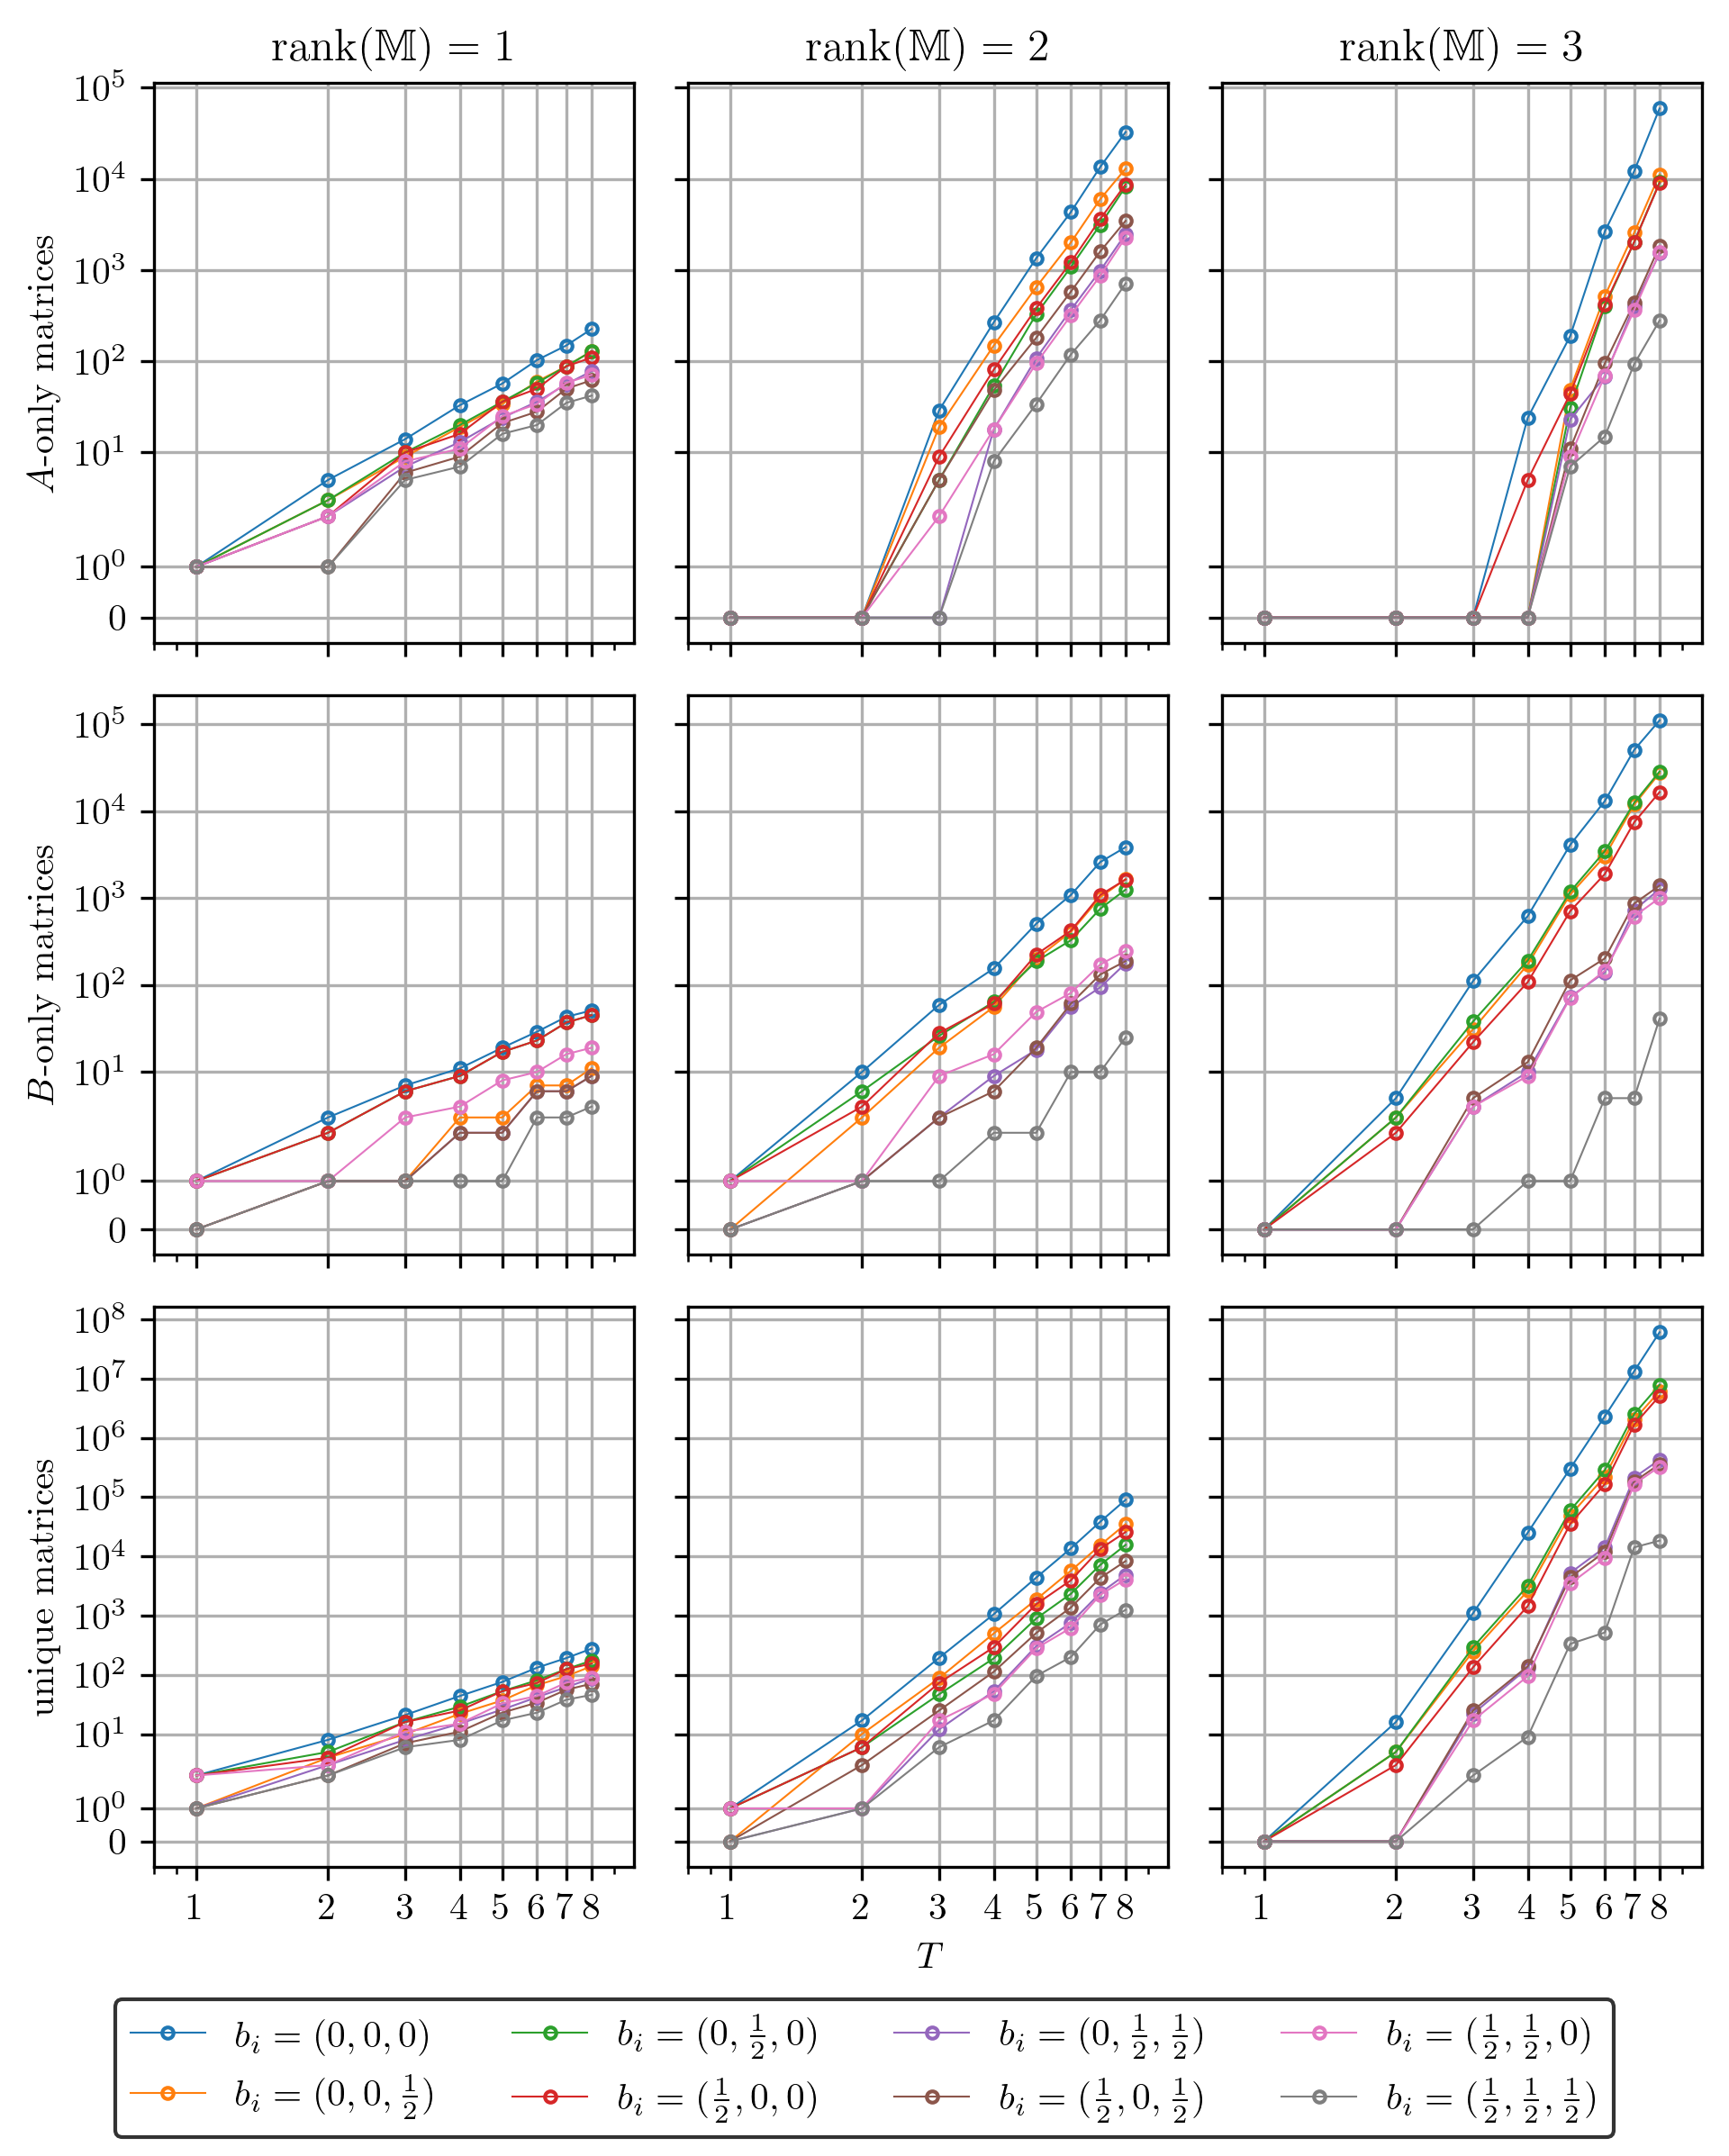

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(6.5, 8), sharex=True, sharey='row', facecolor='w')

for ax, data in zip(axes.ravel(),
                       [collected_A1, collected_A2, collected_A3,
                        collected_B1, collected_B2, collected_B3,
                        unique_1,     unique_2,     unique_3     ]):
    ax.plot(TT, data, '-o', ms=3, lw=0.5, mfc='None')
    ax.set_xscale('log')
    ax.set_yscale('symlog')
    ax.grid()

plt.xlim(0.8, 10)
plt.xticks(range(1, 9), labels=range(1, 9))

axes[0, 0].set_title('$\mathrm{rank}(\mathbb{M})=1$')
axes[0, 1].set_title('$\mathrm{rank}(\mathbb{M})=2$')
axes[0, 2].set_title('$\mathrm{rank}(\mathbb{M})=3$')

axes[2, 1].set_xlabel('$T$')
axes[0, 0].set_ylabel('$A$-only matrices')
axes[1, 0].set_ylabel('$B$-only matrices')
axes[2, 0].set_ylabel('unique matrices')

plt.tight_layout()

fig.legend(labels=bix2_labels, loc='lower center', ncol=4, edgecolor='k')
plt.subplots_adjust(bottom=0.13)

# plt.savefig('images/matrices_grid.png', dpi=300)
plt.show()

## Analysis

In [14]:
T = 8
bix2 = '000'

files = glob.glob('matrixdata_counted_summaries/T{}_2bi{}_counted_rank*_*_summary.txt'.format(T, bix2))

rmincounts_noK, rmincounts, rankcounts_noK, rankcounts = braneAnalysis.getSummaryData(T, bix2, files)
print('max rank:', rankcounts[0][rankcounts[1] > 0][-1])

c=1, noK : 	890,565,159	890,565,159
c=1,   K : 	5,554,303	5,554,303
c=p, noK : 	20,114,075,740,796,013,040,830	20,114,075,740,796,013,053,000
c=p,   K : 	134,474,650,261	134,474,650,261
max rank: 138


In [8]:
maxrank = [4, 8, 12, 22, 32, 62, 81, 138]
numvacua_000 = np.array([1, 45, 393, 17867, 271705, 16885497, 738006485, 134474650261])
numvacua_001 = np.array([0,  9,   0,  1422,      0,   209150,         0,     95430361])
numvacua_010 = np.array([0, 14,   0,  1348,      0,   210513,         0,     72703621])
numvacua_100 = np.array([0, 12,   0,  1106,      0,   163841,         0,     62928907])
numvacua_011 = np.array([0,  3,   0,    95,      0,     4330,         0,       227872])
numvacua_101 = np.array([0,  3,   0,    99,      0,     4263,         0,       250768])
numvacua_110 = np.array([0,  6,   0,   116,      0,     4363,         0,       202210])
numvacua_111 = np.array([0,  1,   0,    22,      0,      184,         0,         5899])

numvacua = numvacua_000 + numvacua_001 + numvacua_010 + numvacua_100 \
          + numvacua_011 + numvacua_101 + numvacua_110 + numvacua_111

In [10]:
from scipy.optimize import curve_fit

In [11]:
def myLin(t, a):
    return a*(t-1)

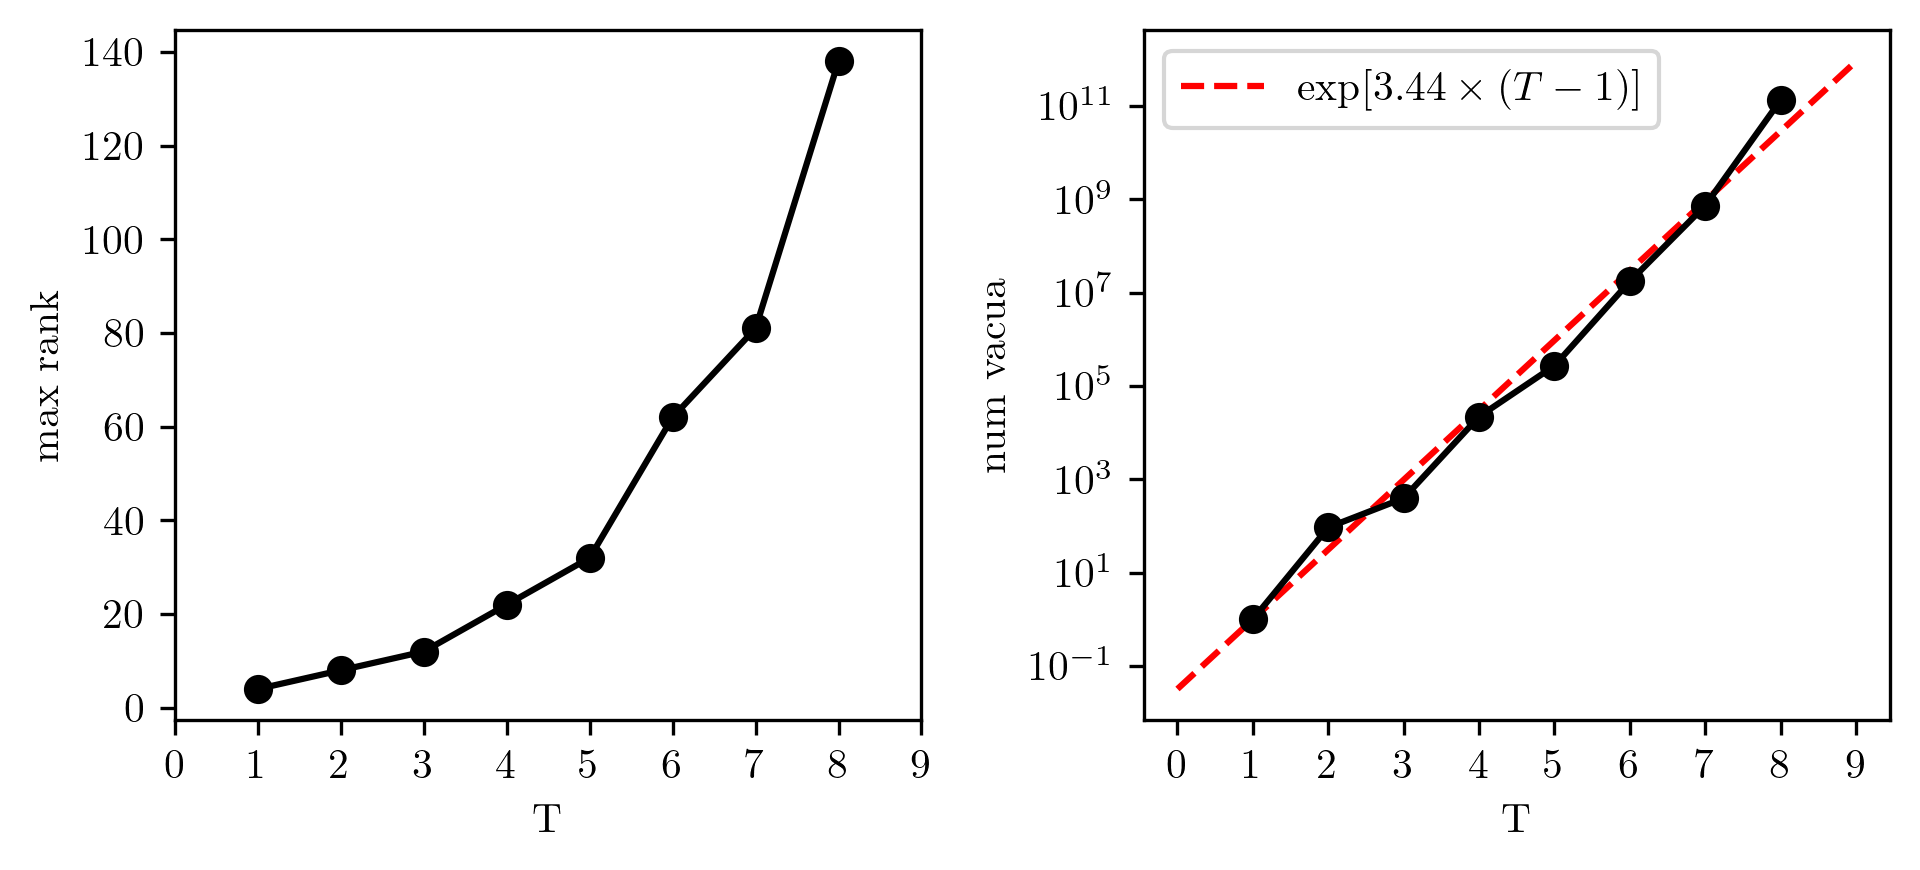

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(6.5, 3), facecolor='w')

axes[0].plot(range(1, 9), maxrank, '-ok')
axes[1].plot(range(1, 9), numvacua, '-ok')

params, pcov = curve_fit(myLin, np.arange(1, 9), np.log(numvacua))
tt = np.linspace(0, 9, 100)
axes[1].plot(tt, np.exp(myLin(tt, *params)), '--r', label=r'$\exp[{:.2f}\times(T-1)]$'.format(params[0]), zorder=0)

axes[0].set_xticks(range(10))
axes[1].set_xticks(range(10))

axes[1].set_yscale('log')

axes[0].set_xlabel('T')
axes[1].set_xlabel('T')

axes[0].set_ylabel('max rank')
axes[1].set_ylabel('num vacua')

axes[1].legend()

plt.tight_layout()

# plt.savefig('T_dependence.png', dpi=300)

plt.show()

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

C:\Users\gerg1\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


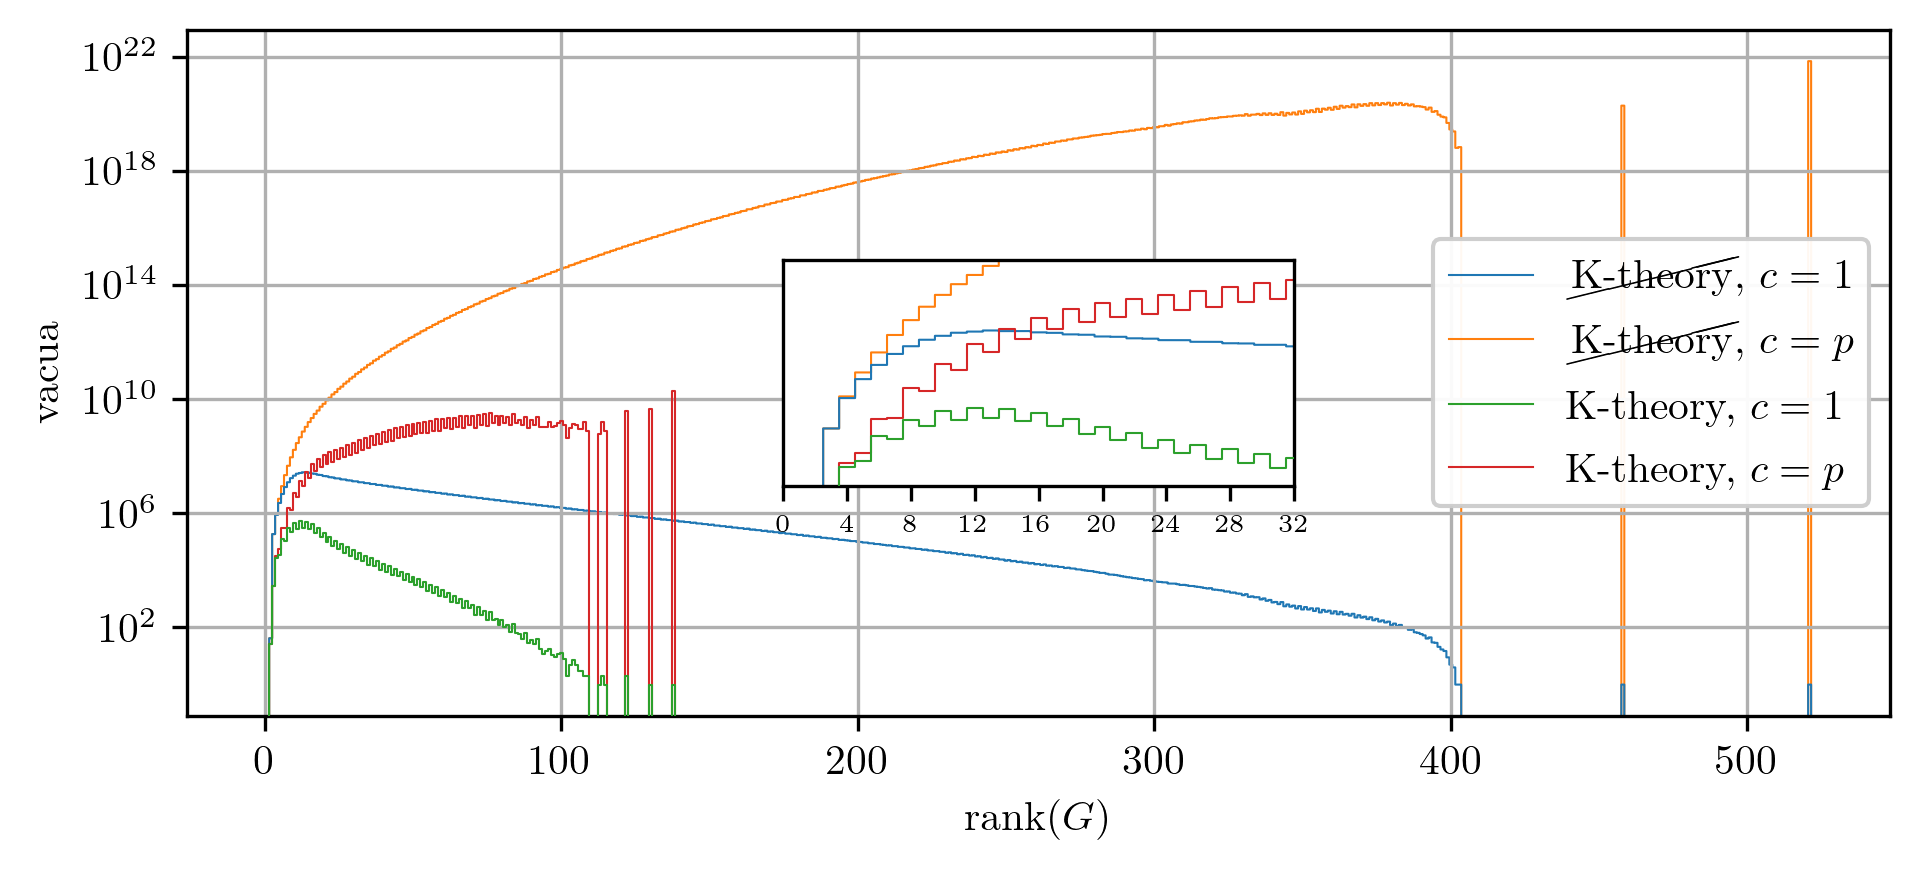

In [18]:
lw = 0.5

fig, ax = plt.subplots(1, 1, figsize=(6.5, 3), facecolor='w')

plt.step(rankcounts_noK[0], rankcounts_noK[1], lw=lw, where='mid', label='$\cancel{\\text{K-theory}}$, $c=1$', zorder=1)
plt.step(rankcounts_noK[0], rankcounts_noK[2], lw=lw, where='mid', label='$\cancel{\\text{K-theory}}$, $c=p$', zorder=0)

plt.step(rankcounts[0], rankcounts[1], lw=lw, where='mid', label='K-theory, $c=1$', zorder=3)
plt.step(rankcounts[0], rankcounts[2], lw=lw, where='mid', label='K-theory, $c=p$', zorder=2)

ax.set_xlabel(r'$\mathrm{rank}(G)$')
ax.set_ylabel(r'vacua')
ax.set_yscale('log')

ax.grid()


inset_ax = inset_axes(ax, width="30%", height="33%", loc=10)
inset_ax.step(rankcounts_noK[0], rankcounts_noK[1], lw=lw, where='mid', zorder=1)
inset_ax.step(rankcounts_noK[0], rankcounts_noK[2], lw=lw, where='mid', zorder=0)
inset_ax.step(rankcounts[0], rankcounts[1], lw=lw, where='mid', zorder=3)
inset_ax.step(rankcounts[0], rankcounts[2], lw=lw, where='mid', zorder=2)
inset_ax.set_xlim(0, 32)
inset_ax.set_yscale('log')
inset_ax.set_ylim(10**4, 10**9)
# inset_ax.set_ylim(-10**4, 1 * 10**7)
inset_ax.set_xticks(range(0, 35, 4))
inset_ax.set_xticklabels(range(0, 35, 4), fontsize=6)
# inset_ax.set_yticks([0, 250000, 500000])
# inset_ax.set_yticklabels([0, '', r'$5\times10^5$'], fontsize=6)
inset_ax.set_yticks([])

ax.legend(loc='right', framealpha=0.95)
plt.tight_layout()

# plt.savefig('images/gaugegrouprank_T={}_2bi={}.png'.format(T, bix2), dpi=300)

plt.show()

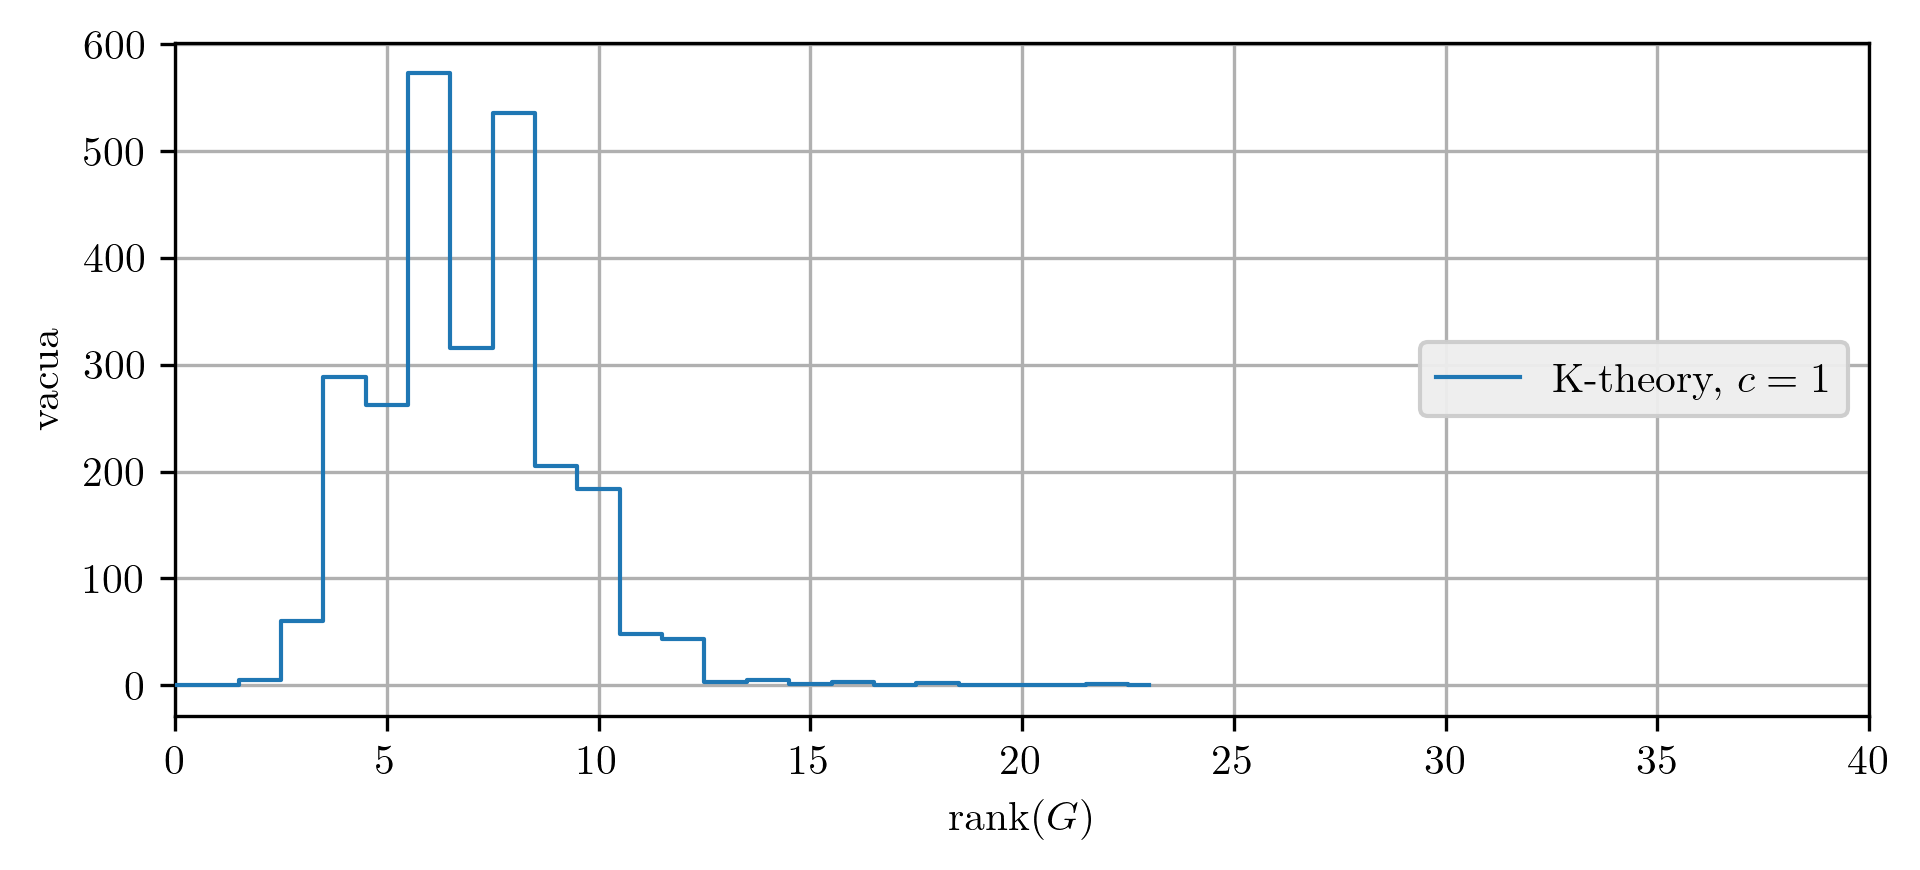

In [150]:
lw = 1

fig, ax = plt.subplots(1, 1, figsize=(6.5, 3), facecolor='w')

plt.step(rankcounts[0], rankcounts[1], lw=lw, where='mid', label='K-theory, $c=1$', zorder=3)

plt.xlabel(r'$\mathrm{rank}(G)$')
plt.ylabel(r'vacua')
# plt.yscale('log')

plt.xlim(0, 40)

plt.grid()

plt.legend(loc='right', framealpha=0.95, facecolor='#eeeeee')
plt.tight_layout()

# plt.savefig('images/gaugegrouprank_T={}_2bi={}_zoomed.png'.format(T, bix2), dpi=300)

plt.show()

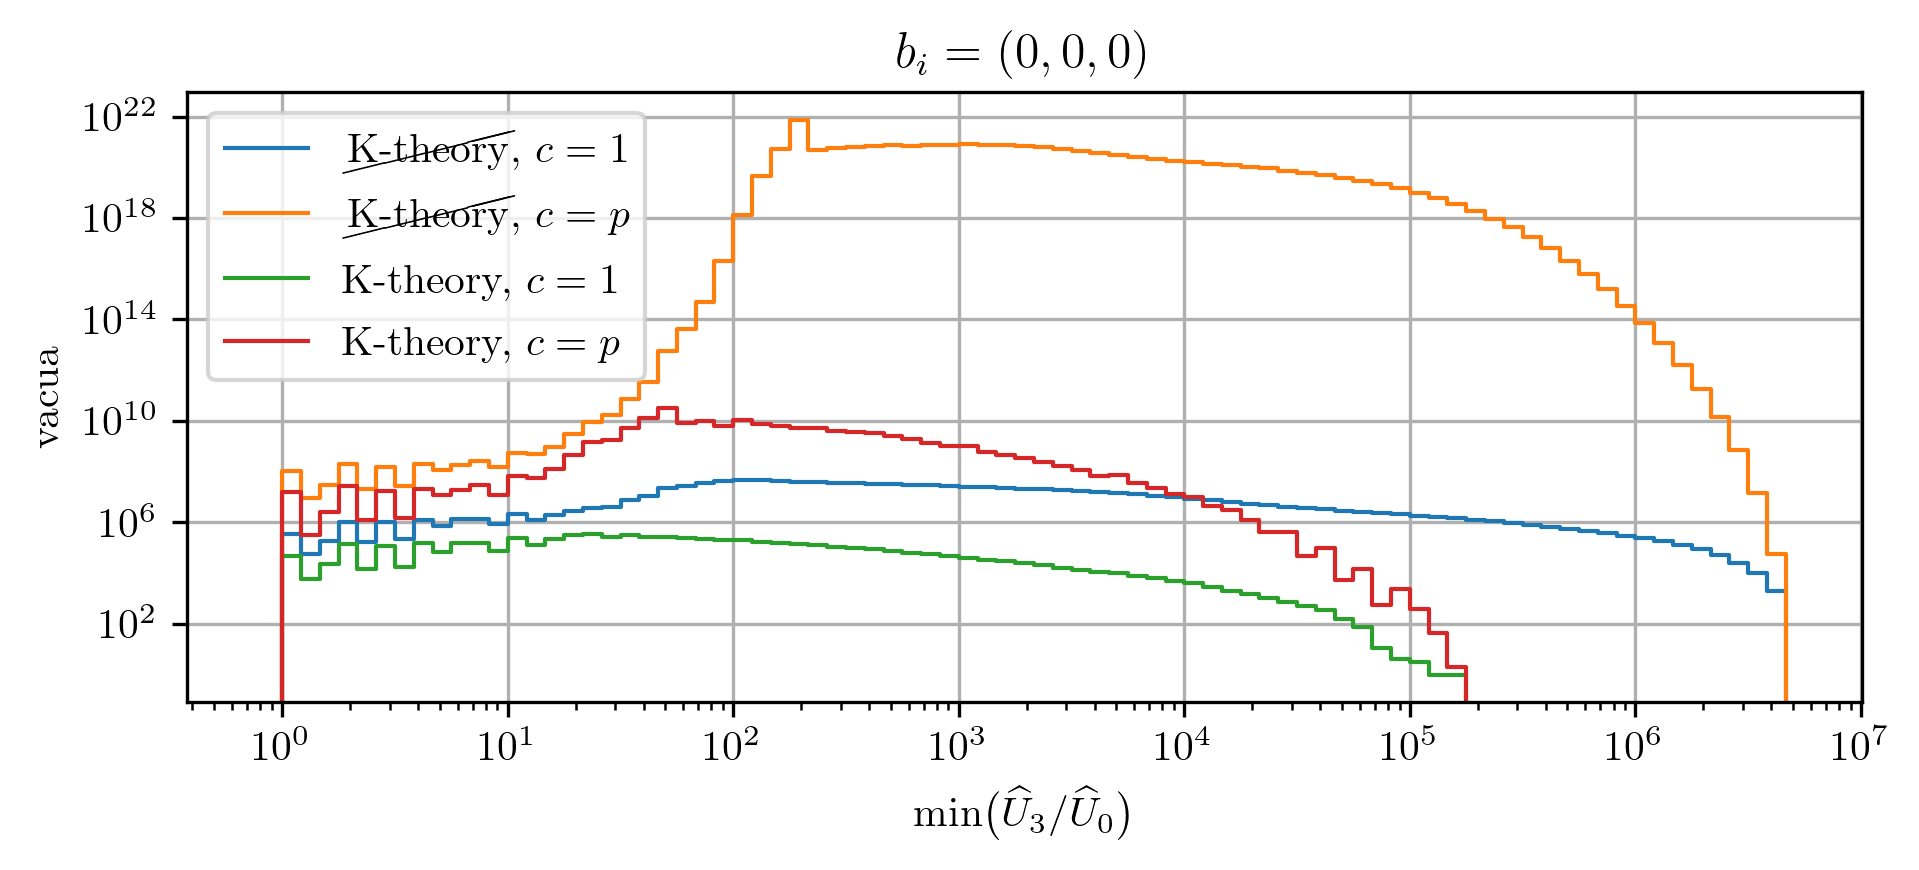

In [21]:
lw = 1

rminarray_noK = 10**(rmincounts_noK[0] / 12)
rminarray     = 10**(rmincounts[0] / 12)

fig, ax = plt.subplots(1, 1, figsize=(6.5, 3), facecolor='w')

# plt.step(rminarray_noK, rmincounts_noK[1], lw=lw, where='post', label='noK, num w/ $>$ 0 soln')
plt.step(rminarray_noK, rmincounts_noK[2], lw=lw, where='post', label='$\cancel{\\text{K-theory}}$, $c=1$')
plt.step(rminarray_noK, rmincounts_noK[3], lw=lw, where='post', label='$\cancel{\\text{K-theory}}$, $c=p$')

# plt.step(rminarray, rmincounts[1], lw=lw, where='post', label='K, num w/ $>$ 0 soln')
plt.step(rminarray, rmincounts[2], lw=lw, where='post', label='K-theory, $c=1$')
plt.step(rminarray, rmincounts[3], lw=lw, where='post', label='K-theory, $c=p$')

plt.xlabel(r'$\mathrm{min}\big(\widehat{U}_3/\widehat{U}_0\big)$')
plt.ylabel(r'vacua')

plt.title(r'$b_i=({},{},{})$'.format(0,0,0))

plt.xscale('log')
plt.yscale('log')

plt.grid()

plt.legend()
plt.tight_layout()

# plt.savefig('images/rmin_T={}_2bi={}.png'.format(T, bix2), dpi=300)

plt.show()

## Graph example

In [408]:
import networkx as nx

In [21]:
T = 6
As = braneCreate.typeAJ(0, [T**3, T, T, T], [0, 0, 0])
adj = braneCount.buildCompatibilityMatrix(As, As, T, [0, T, T, T], [T**3, 0, 0, 0], J_addable=[0], remove_diag=True)
adj = np.array(adj, dtype='int')
used = np.sum(adj, axis=0) > 0
As = As[used]
adj = adj[used]
adj = adj[:, used]

39 / 399 = 9.77 %	0.0065 min
79 / 399 = 19.80 %	0.011 min
119 / 399 = 29.82 %	0.013 min
159 / 399 = 39.85 %	0.019 min
199 / 399 = 49.87 %	0.021 min
239 / 399 = 59.90 %	0.025 min
279 / 399 = 69.92 %	0.028 min
319 / 399 = 79.95 %	0.03 min
359 / 399 = 89.97 %	0.031 min
398 / 399 = 99.75 %	0.031 min


539
364.0


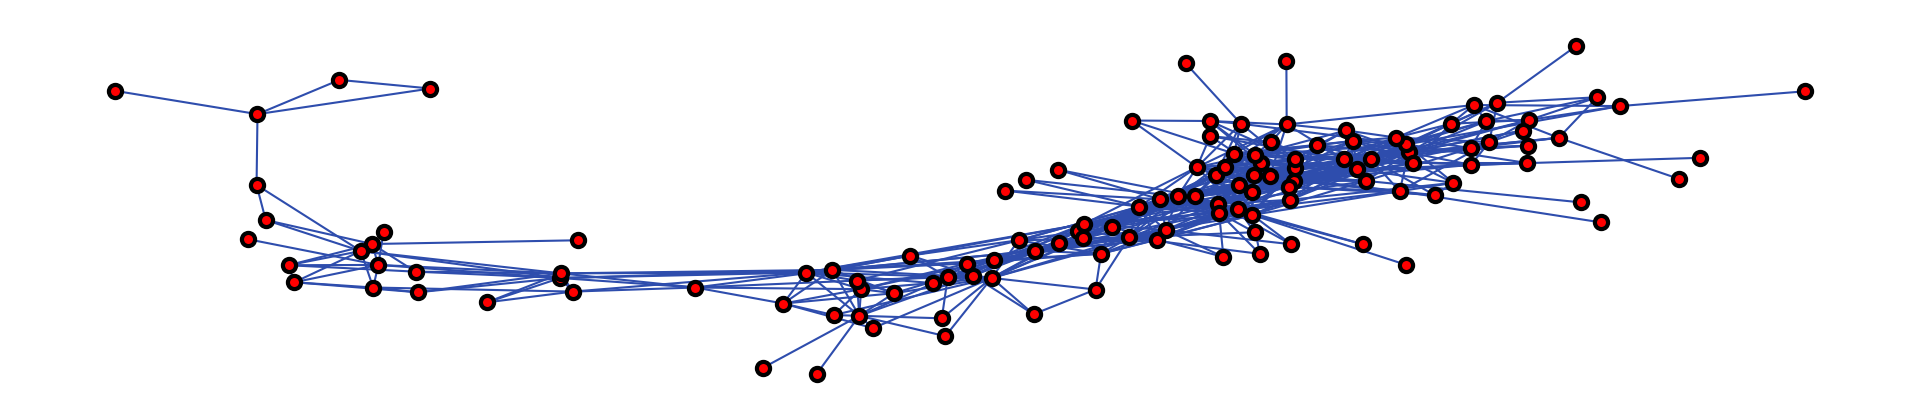

In [697]:
gr = nx.Graph()
gr = nx.from_numpy_matrix(adj)
print(gr.number_of_edges())
adj3 = np.matmul(np.matmul(adj, adj), adj)
print(np.trace(adj3) / 6)

fig, ax = plt.subplots(1, 1, figsize=(6.5, 1.5))
pos = nx.spring_layout(gr, k=3/np.sqrt(len(As)), seed=21, iterations=100)
nx.draw(gr,
        pos=pos,
        node_color='r', edgecolors='k', node_size=10,
        edge_color='#2E4DAD', width=0.5)

plt.tight_layout()

plt.savefig('images/graph.png', dpi=300)
plt.show()

In [38]:
edges = 0
for ii, jj in combinations(range(len(adj)), 2):
    if adj[ii, jj]:
        edges += 1
print(edges)

539


In [41]:
triples = 0
for ii in range(len(adj)):
    for jj in range(ii+1, len(adj)):
        if not adj[ii, jj]:
            continue
        for kk in range(jj+1, len(adj)):
            if adj[ii, kk] and adj[jj, kk]:
                triples += 1
print(triples)

364


In [42]:
quads = 0
for ii in range(len(adj)):
    for jj in range(ii+1, len(adj)):
        if not adj[ii, jj]:
            continue
        for kk in range(jj+1, len(adj)):
            if not (adj[ii, kk] and adj[jj, kk]):
                continue
            for ll in range(kk+1, len(adj)):
                if adj[ii, ll] and adj[jj, ll] and adj[kk, ll]:
                    quads += 1
print(quads)

107


In [43]:
quints = 0
for ii in range(len(adj)):
    for jj in range(ii+1, len(adj)):
        if not adj[ii, jj]:
            continue
        for kk in range(jj+1, len(adj)):
            if not (adj[ii, kk] and adj[jj, kk]):
                continue
            for ll in range(kk+1, len(adj)):
                if not (adj[ii, ll] and adj[jj, ll] and adj[kk, ll]):
                    continue
                for mm in range(ll+1, len(adj)):
                    if adj[ii, mm] and adj[jj, mm] and adj[kk, mm] and adj[ll, mm]:
                        quints += 1
print(quints)

20


In [44]:
sexts = 0
for ii in range(len(adj)):
    for jj in range(ii+1, len(adj)):
        if not adj[ii, jj]:
            continue
        for kk in range(jj+1, len(adj)):
            if not (adj[ii, kk] and adj[jj, kk]):
                continue
            for ll in range(kk+1, len(adj)):
                if not (adj[ii, ll] and adj[jj, ll] and adj[kk, ll]):
                    continue
                for mm in range(ll+1, len(adj)):
                    if not (adj[ii, mm] and adj[jj, mm] and adj[kk, mm] and adj[ll, mm]):
                        continue
                    for nn in range(mm+1, len(adj)):
                        if adj[ii, nn] and adj[jj, nn] and adj[kk, nn] and adj[ll, nn] and adj[mm, nn]:
                            sexts += 1
print(sexts)

1
